In [ ]:
pip install scikit-fuzzy

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Step 1: Definition of input and output variables
facilidad_uso = ctrl.Antecedent(np.arange(0, 101, 1), 'Facilidad de Uso')
satisfaccion = ctrl.Antecedent(np.arange(-3, 4, 1), 'Satisfaccion')
eficiencia = ctrl.Antecedent(np.arange(0, 601, 1), 'Eficiencia')

probabilidad_recomendacion = ctrl.Consequent(np.arange(0, 101, 1), 'Probabilidad de Recomendacion')
calidad_ux = ctrl.Consequent(np.arange(0, 101, 1), 'Calidad UX')

# Paso 2: Creación de funciones de pertenencia ajustadas para solapamiento
# Facilidad de Uso
facilidad_uso['baja'] = fuzz.trimf(facilidad_uso.universe, [0, 0, 60])
facilidad_uso['media'] = fuzz.trimf(facilidad_uso.universe, [40, 60, 80])
facilidad_uso['alta'] = fuzz.trimf(facilidad_uso.universe, [60, 80, 100])

# Satisfacción
satisfaccion['insatisfecho'] = fuzz.trimf(satisfaccion.universe, [-3, -2, 0])
satisfaccion['neutral'] = fuzz.trimf(satisfaccion.universe, [-1, 0, 1])
satisfaccion['satisfecho'] = fuzz.trimf(satisfaccion.universe, [0, 2, 3])

# Eficiencia
eficiencia['baja'] = fuzz.trapmf(eficiencia.universe, [200, 300, 600, 600])
eficiencia['media'] = fuzz.trimf(eficiencia.universe, [100, 300, 500])
eficiencia['alta'] = fuzz.trimf(eficiencia.universe, [0, 100, 300])

# Probabilidad de Recomendación y Calidad UX
probabilidad_recomendacion.automf(3)
calidad_ux.automf(3)

# Paso 3: Reglas de inferencia ajustadas
rule1 = ctrl.Rule(facilidad_uso['alta'] & satisfaccion['satisfecho'], probabilidad_recomendacion['good'])
rule2 = ctrl.Rule(facilidad_uso['media'] | satisfaccion['neutral'], probabilidad_recomendacion['average'])
rule3 = ctrl.Rule(eficiencia['alta'], calidad_ux['good'])
rule4 = ctrl.Rule(facilidad_uso['alta'] & satisfaccion['satisfecho'] & eficiencia['alta'], calidad_ux['good'])
rule5 = ctrl.Rule(facilidad_uso['baja'] | satisfaccion['insatisfecho'], calidad_ux['poor'])

# Crear el sistema de control con las reglas ajustadas
control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
control_simulation = ctrl.ControlSystemSimulation(control_system)

# Entrada ajustada para un resultado mejorado
control_simulation.input['Facilidad de Uso'] = 80
control_simulation.input['Satisfaccion'] = 2
control_simulation.input['Eficiencia'] = 250

# Calcular la salida
control_simulation.compute()

# Resultados
output_probabilidad_recomendacion = control_simulation.output['Probabilidad de Recomendacion']
output_calidad_ux = control_simulation.output['Calidad UX']

print("Probabilidad de Recomendación:", output_probabilidad_recomendacion)
print("Calidad General de la Experiencia de Usuario:", output_calidad_ux)


Probabilidad de Recomendación: 83.33333333333336
Calidad General de la Experiencia de Usuario: 77.97619047619047


In [ ]:

# Investigate the universe of the probabilidad_recomendacion consequent
print("Universe of Probabilidad de Recomendacion Consequent:", probabilidad_recomendacion.universe)

# Investigate the output of the control_simulation for the Probabilidad de Recomendacion consequent
print("Output of Control Simulation for Probabilidad de Recomendacion Consequent:", control_simulation.output['Probabilidad de Recomendacion'])

# Investigate the universe of the calidad_ux consequent
print("Universe of Calidad UX Consequent:", calidad_ux.universe)

# Investigate the output of the control_simulation for the Calidad UX consequent
print("Output of Control Simulation for Calidad UX Consequent:", control_simulation.output['Calidad UX'])

# Compare the universes
if np.array_equal(probabilidad_recomendacion.universe, control_simulation.output['Probabilidad de Recomendacion'].shape) and \
   np.array_equal(calidad_ux.universe, control_simulation.output['Calidad UX'].shape):
    print("The universes match.")
else:
    print("The universes do not match.")

Universe of Probabilidad de Recomendacion Consequent: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100]
Output of Control Simulation for Probabilidad de Recomendacion Consequent: 83.33333333333336
Universe of Calidad UX Consequent: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 1

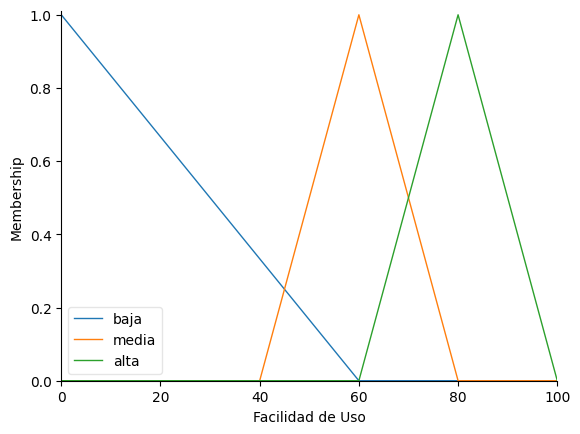

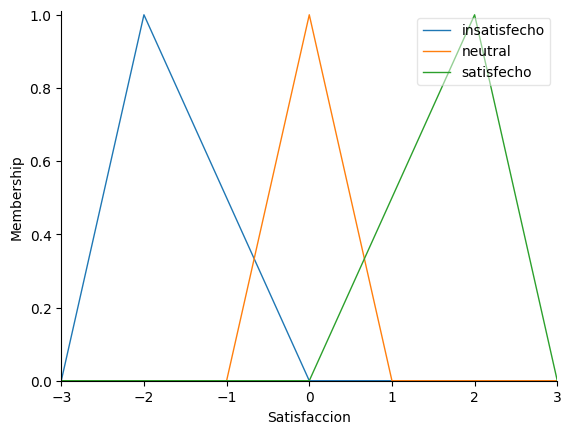

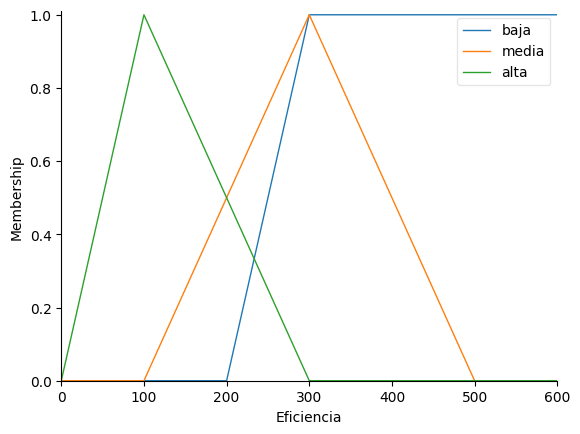

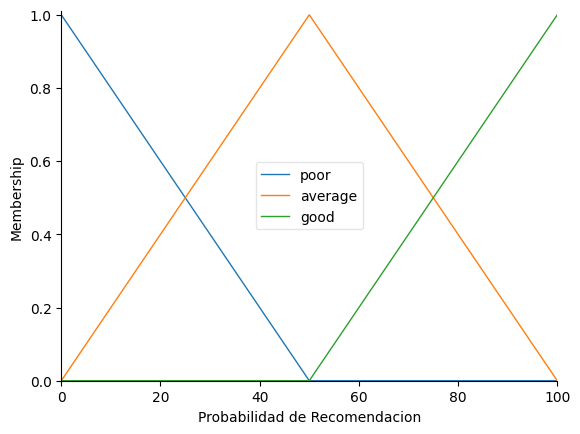

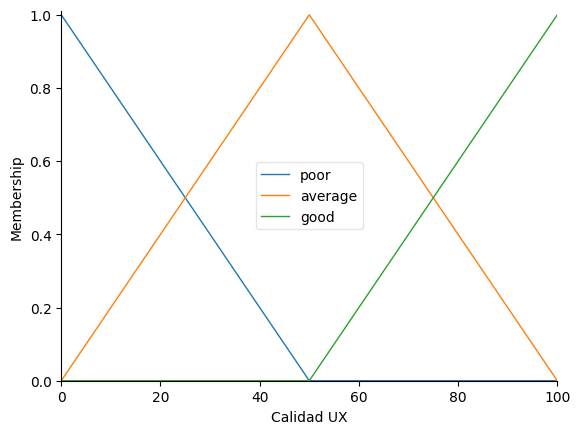

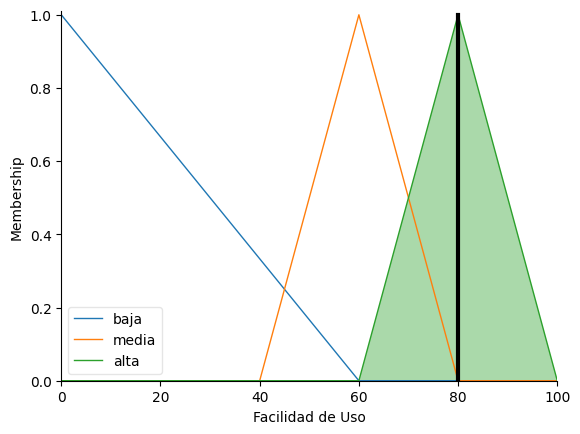

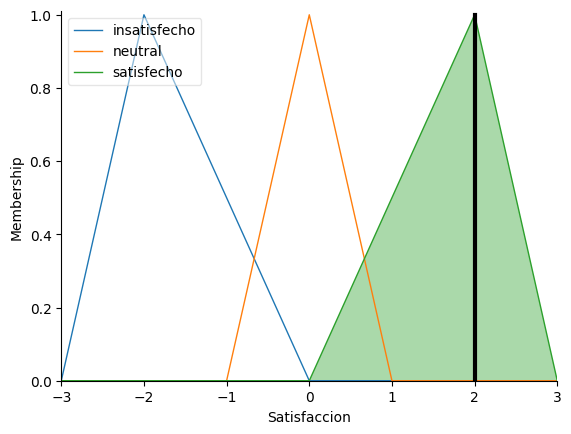

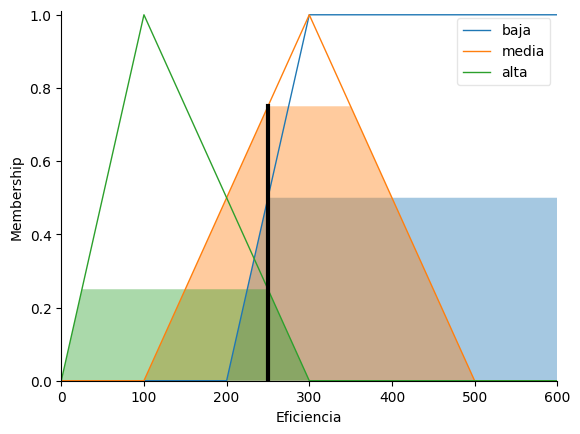

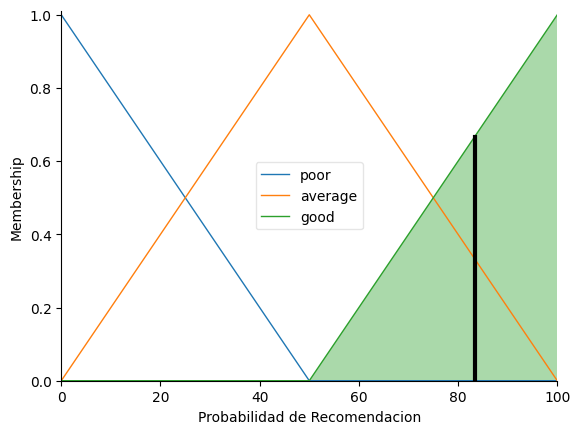

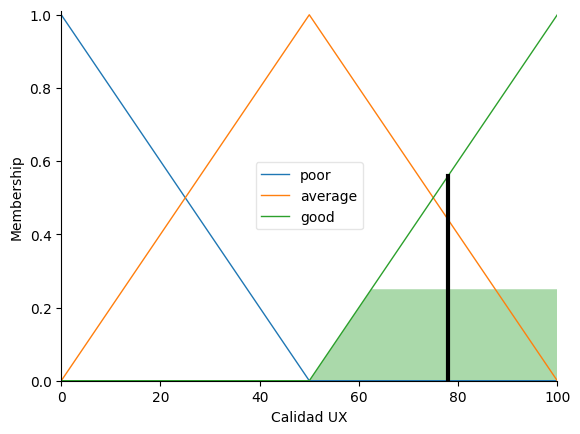

In [ ]:
import matplotlib.pyplot as plt

# Graficar las funciones de pertenencia de las variables de entrada
facilidad_uso.view()
satisfaccion.view()
eficiencia.view()

# Graficar las funciones de pertenencia de las variables de salida
probabilidad_recomendacion.view()
calidad_ux.view()

# Ejecutar la simulación con los valores de entrada dados
control_simulation.input['Facilidad de Uso'] = 80
control_simulation.input['Satisfaccion'] = 2
control_simulation.input['Eficiencia'] = 250
control_simulation.compute()

# Graficar los resultados de la simulación en las funciones de pertenencia
facilidad_uso.view(sim=control_simulation)
satisfaccion.view(sim=control_simulation)
eficiencia.view(sim=control_simulation)
probabilidad_recomendacion.view(sim=control_simulation)
calidad_ux.view(sim=control_simulation)

# Mostrar todas las gráficas
plt.show()
